# Classifying Images with CNN:

This project aims to build a Convolutional Neural Network (CNN) that will be able to classify images that consists of clothing articles. These images are primarily taken from the Zalando Research Dataset. Generally, this project will go through creating an image-classification model, cross-validating it and then explore methods to improve on the model. 

## Breakdown of this Project:
- Image-Feature Extration
- CNN:
    - Network Topology
    - Activation Functions
    - Convolutional Layers and Filters
    - Max Pooling Layers
    - Flattening
    - Fully-connected Layers and output
- Building the CNN model with KERAS:
    - Train using the Zalando research dataset
    - Classify the images

## 1 Exploring Concepts: Image-Feature Extraction

Before any classification can be done, the raw images (unstructured data like text or images) from the dataset has to be processed into a machine compatible format. This is where the data is converted from a non-numeric format into a numerical representation and the process is called __Feature Extraction__. For images, the data presents in pixel values where for example, if an image is a 800x600 pixel grayscale image, then it would mean that it contains 800x6000 matrix of pixel intensities (colour). Since the image is grayscale, then the pixel values can have a range from 0 to 255, where 0 pixel is completely black in colour and 255 is completely white in colour, and the number ranges between 0 to 255 are different shades of gray. 

## 1.1 Demonstration: Greyscale Images

### Import the required Libraries:

In [48]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os

from IPython.display import Image
from IPython.core.display import Image, display ,HTML

%matplotlib inline

#### Demonstrate with Cat images:

In [5]:
# Pathway to images:
filename = 'grayscale_cat_burrito.jpg'
pathway = os.getcwd()
print(pathway)

# Read Image:
cat_image = mpimg.imread(pathway + '/Demonstration Images/' + filename)

/Users/y.s.lee/OneDrive/Packt - Python Machine Learning Blue Prints/Project 7 - Classifying Images with CNN


In [6]:
cat_image

array([[173, 176, 179, ..., 227, 229, 231],
       [173, 174, 176, ..., 227, 228, 229],
       [168, 173, 173, ..., 228, 228, 228],
       ...,
       [ 24,  26,  26, ...,  55,  52,  51],
       [ 27,  25,  17, ...,  56,  53,  51],
       [ 25,  26,  19, ...,  58,  55,  53]], dtype=uint8)

Upon inspecting the cat_image, it can be seen that the output is a 2-dimensional numpy ndarray which contains the raw features of the image.

#### Further description of the image:

In [7]:
# Shape of the image: shows the image height x width.
cat_image.shape

(1150, 1150)

In [8]:
# Maximum and minimum pixel values in the ndarray:
print(cat_image.max())
print(cat_image.min())

239
0


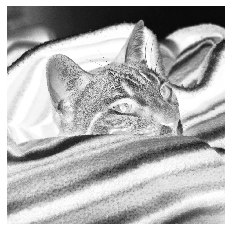

In [14]:
# Display the Image:
plt.axis('off')
plt.imshow(cat_image, cmap= 'Greys');

## 1.2 Demonstration: Coloured Images

Colour images are slightly different where the output would be a __Tensor__, meaning that it is a 3-dimensional numpy ndarray and the 3rd value representing the RGB pixel value. 

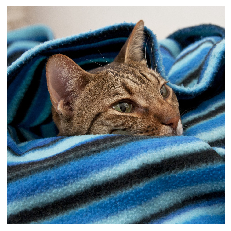

In [16]:
# Read Image:
filename = 'color_cat_burrito.jpg'
cat_image_colour = mpimg.imread(pathway + '/Demonstration Images/' + filename)

# Plot the Colour Image:
plt.axis('off')
plt.imshow(cat_image_colour);

#### So far, these images have been loaded and converted into its respective numerical values for either greyscale (2D array) or coloured (3D array). There is also a problem that persist with these images when flatten, that is to say that these arrays are represented as a single row rather than 2D or 3D. This would mean that the image height and width when combined would produce 1,322,500 columns of values per image in every row as seen below: 

In [17]:
# Flatten the Grey Scale image:
len(cat_image.flatten())

1322500

#### Having such a large number would be an issue when it comes to machine learning where its high dimensionality would result in model performance being hindered, such as slow training times or model overfitting. This is called the __Dimensionality problem__. 

### So CNN models provides a solution to tackle these issues.

## 2 Convolutional Neural Networks:

There are several components of a CNN that makes it suitable for image classification tasks. This section will cover some of the intuition behind how a CNN works. 

## 2.1 Network Architecture:

The following two diagrams both depicts similar architectures for the CNN model. 

To begin with, let's have a look to the left side of the diagrams, where you can see either a sunflower or the number 2 digit, these are the input source of the CNN. These images will contain matices of values describing the image height and width as well as the pixel colour (similar to the description in the previous section). The image data would then be pass through a series of alternating convolutional and max-pooling layers in the model. These are the layers that defines the CNN component of the architecture depicted in the diagrams below. 

After being processed by these layers, the data will then arrive at the fully-connected layer (FC) before reaching the output layer. It is also not necessary to use only the fully-connected layer here, but alternatives like Softmax or Random Forest classifiers are acceptable. Following the fully-connected layer is the output layer, which is essentially the same as any other multiclass classifiers where it would give the predicted probabilities of the classes for which the image belongs to. A maximum probabilty is used to indicate what the model believes to be the most likely class for a given image. 

Sources: 
- (1) Chollet, F. (2017). Deep Learning with Python (1st ed.). USA: Manning Publications Co.
- (2) https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

In [55]:
# Set up the working directory for the images:
image_folderName = 'CNN Architecture Images'
image_path = os.path.abspath(image_folderName) + '/'


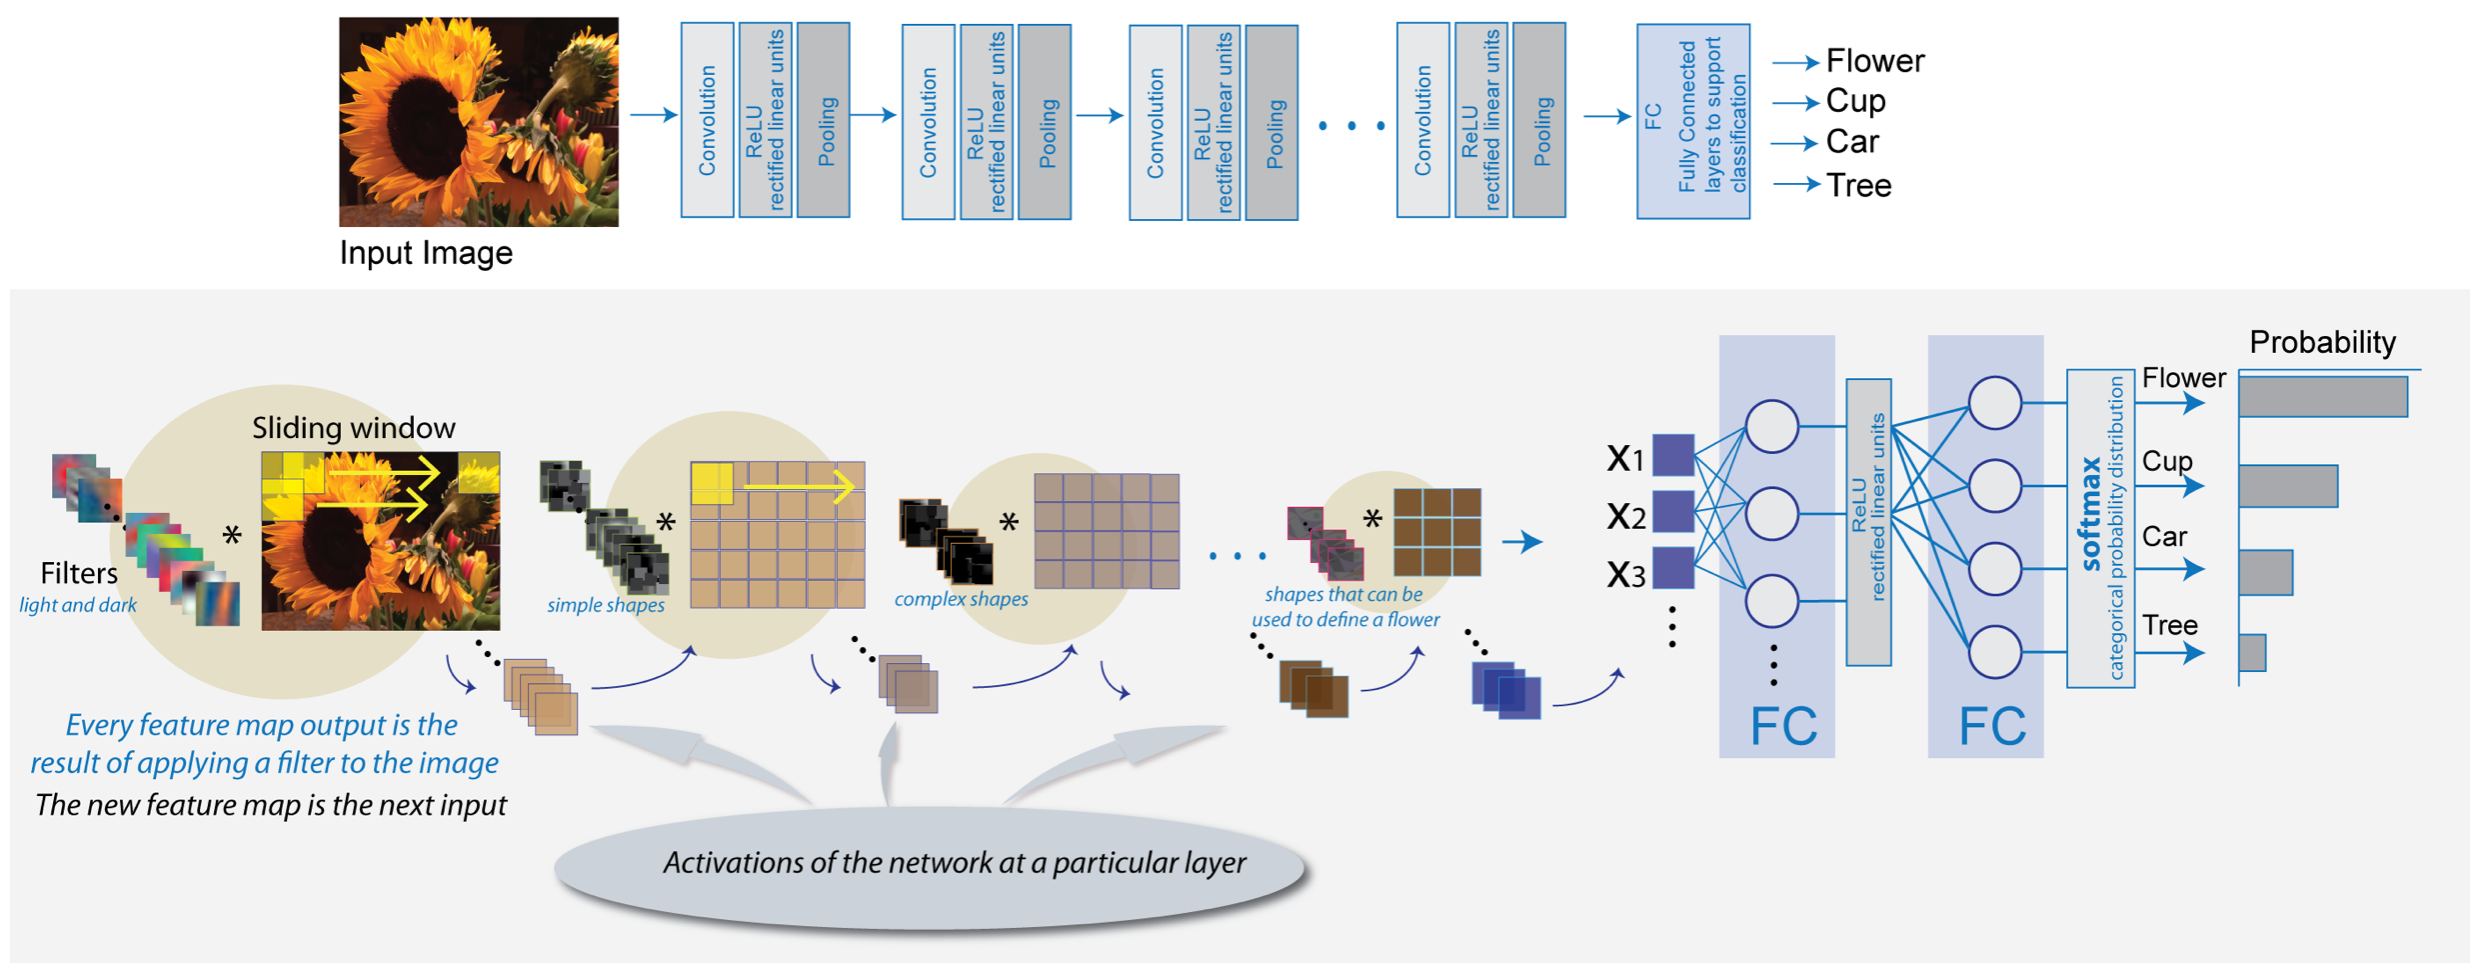

Image ref -> https://www.mathworks.com/help/deeplearning/ug/introduction-to-convolutional-neural-networks.html


In [30]:
# Network Architecture: Image 1
display(Image(image_path+'CNN architecture 2.png', width=1100, unconfined=True))
print('Image ref -> https://www.mathworks.com/help/deeplearning/ug/introduction-to-convolutional-neural-networks.html')

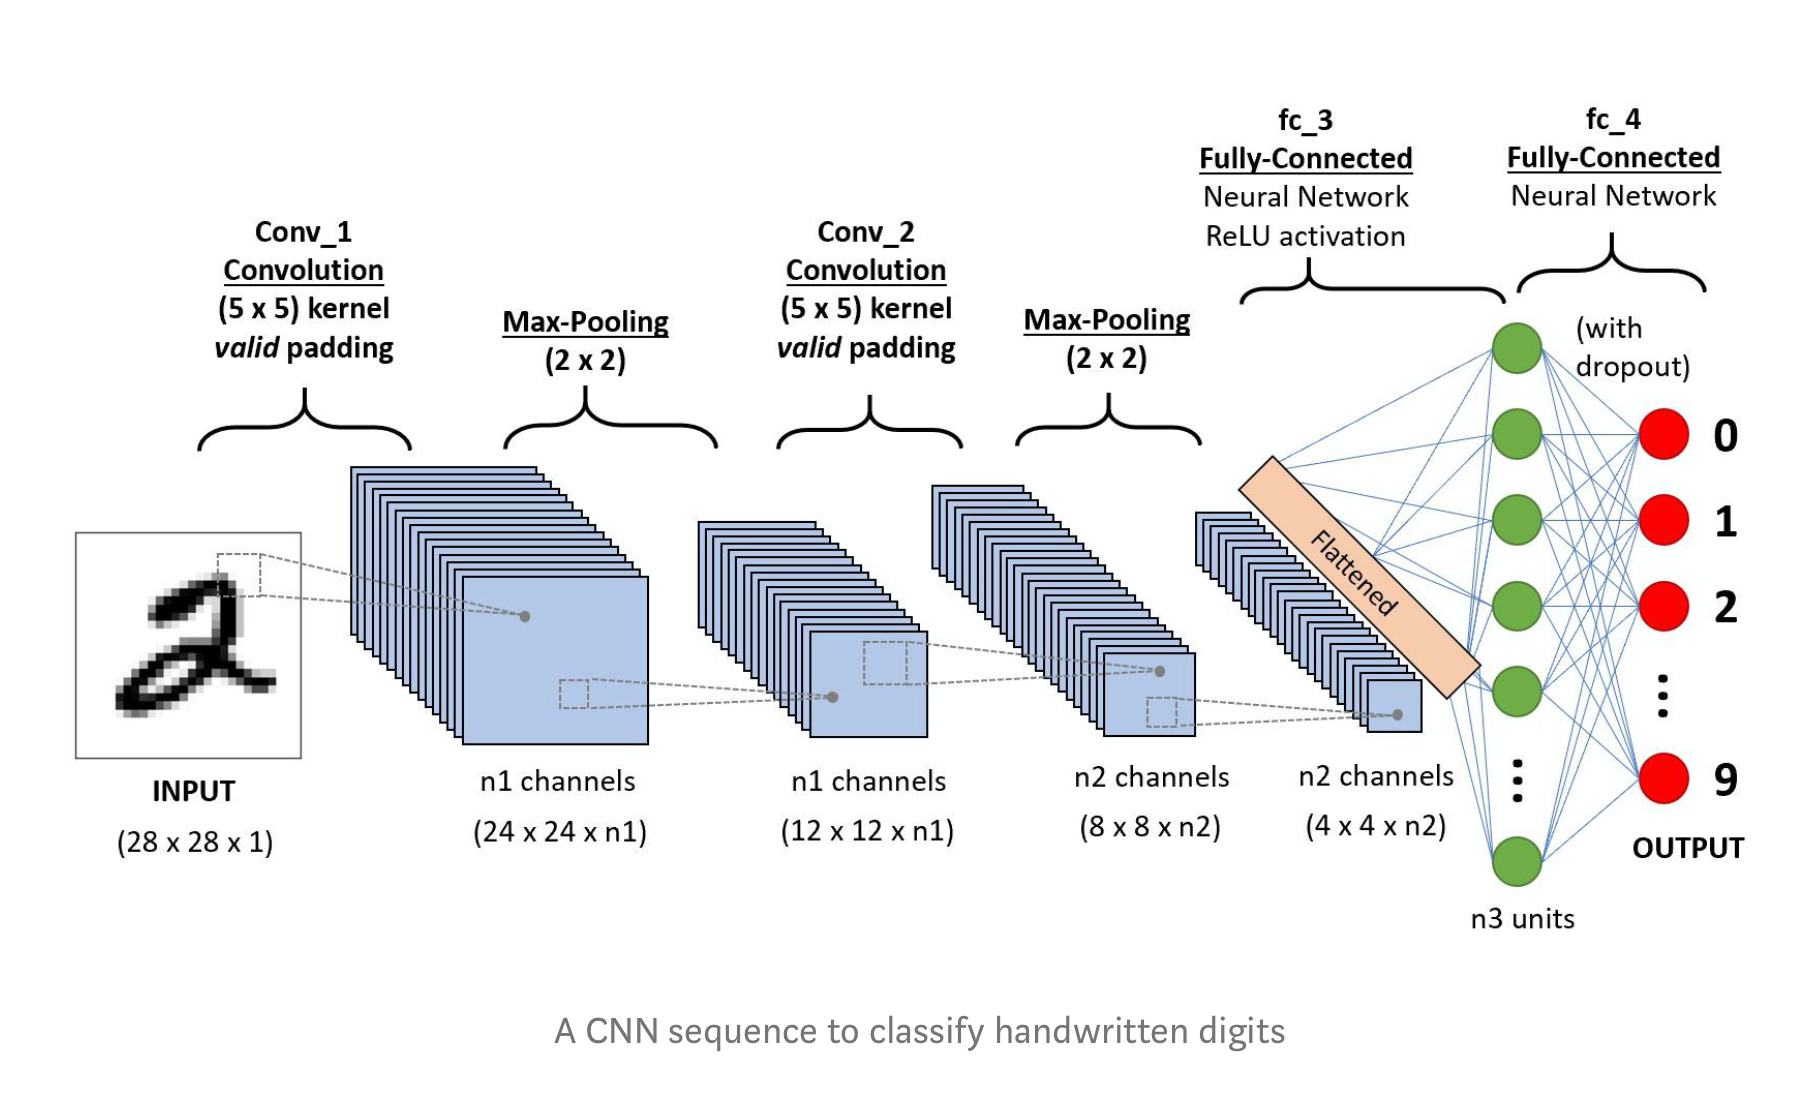

Image ref -> https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


In [31]:
# Network Architecture: Image 2
display(Image(image_path+'CNN architecture.png', width=1100, unconfined=True))
print('Image ref -> https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53')

#### In more detail: taking the 2nd image (Digits) as an example.

The network architecture/topoly can be further described as follows:
- How many Convolutoinal layer is present in the network above?
__Ans:__ there are 2 layers (denoted as Conv_1 and Conv_2).

- In each Convolutional layer, how many feature maps would there be?
__Ans:__ There are 16 feature maps in Conv_1 and 24 feature maps in Conv_2.

- How many pooling (max-pooling) layers are there in the network?
__Ans:__ There are 2 max-pooling layers.

- How many fully-connected layers are there in the network?
__Ans:__ There is only 1 FC layer (depicted as the green dots)

- How many neurons are there in the FC layer?
__Ans:__ In this case, there are a few neurons (n3 units) where in this case, a good guess is probably 10 neurons.

- And the output layer?
__Ans:__ There are 9 output nodes.

The decision to use either 2 or more convolutional layers in the model architecture or more than one fully-connected layer can be thought of as configuring the hyperparameters of the CNN model. These are fine-tuned through experiments and cross-validation methods. These hyperparameters are not to be learnt or optimised by the model itself. This neural network have an output of 9 nodes which leads to a multiclass classification task for 9 classes. If it was configured as a regression or binary classifcation problem, the network would have a single output node instead. Another thing to note is that the model has 16 filters (or kernel) in Conv_1 layer and 24 filters in Conv_2 layer as a results of the number of feature maps resulting from each layer.

#### In more detail: taking the 1st image (Sunflower) as an example.

The design of a neuron is set up to calculate the weighted sum of its inputs. Without the inclusion of the activation function, the output generated from all of these neurons would be considered relevant and may output inaccurate or confusing results as the calculation may also include irrelevant information. The main role of an activation function is to convert the inputs to an output, and this output can then be used in the following layer in the stack (also known as the transfer function). It therefore helps to distinguish if the calculated weight sum of inputs is useful. The rectified linear unit (ReLU) is the activation function used in this model. The ReLU function has a range of zero to an infinite value for positive outputs, whereas any negative outputs are reduced to zero. This essentially means that neurons with negative outputs will be deactivated. It should be noted that there are several types of activation function, which can be found through online sources.

The diagram below shows the RELU function:

Source: Kakaraparthi, V. (2019). Activation Functions in Neural Networks. Retrieved from https://medium.com/@prateekvishnu/activation-functions-in-neural-networks-bf5c542d5fec

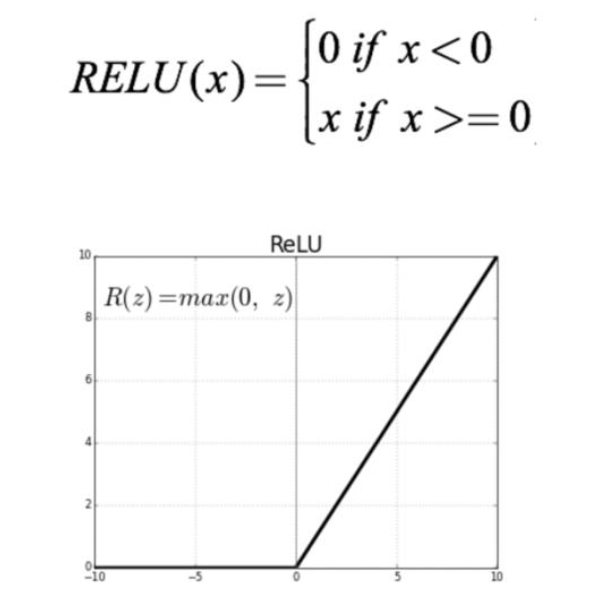

Image ref -> https://medium.com/@prateekvishnu/activation-functions-in-neural-networks-bf5c542d5fec


In [33]:
# Activation Functions: 
display(Image(image_path+'RELU activation function.png', width=400, unconfined=True))
print('Image ref -> https://medium.com/@prateekvishnu/activation-functions-in-neural-networks-bf5c542d5fec')

## 2.1 Convolutional Layers and Filters:

Convolutional layers and filters are the most vital components of a CNN as it gives the model the ability to learn the representations and features from the input data.

### Convolutions:

First, the following diagram shows a convolution of an input sample:

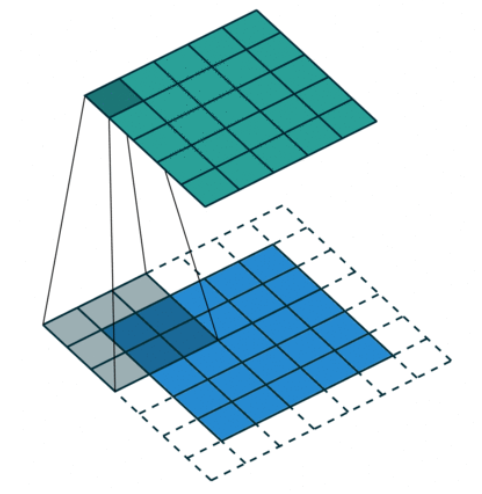

Image ref -> https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


In [35]:
# Convolutional Layers and filters: 
display(Image(image_path+'Convolutions image 1.png', width=400, unconfined=True))
print('Image ref -> https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53')

Described in more detail by the following parameters:
- Kernel Size – The kernel size can be defined as the field of view available for the convolution. For example, a 2D convolution, it would be 3 taking up 3x3 pixels.
- Stride – The stride determines the step size of traversal that the kernel performs. For example, by default this would usually be set to 1, or set to 2 for down sampling an image to be like MaxPooling.
- Padding – It determines the handling of the border surrounding the sample. For example, a half-padded convolution maintains the spatial output dimensions to be equal to that of the input. An unpadded convolution will remove or crop out the border when the kernel is larger than 1.
- Input and output channels – In general, the convolution layer will take in a certain number of input channels (I) and computes a specific number of output channels (O). The required parameters for this layer are the following: I x O x K, where K is the number of values in the kernel.

#### 2D Convolutions operation:

The operation of the 2D convolutions starts with a kernel, where a kernel can be defined as a small matrix of weights, that will slide or traverse over the 2D input data. In doing so, it then performs an element-wise multiplication with the input values that the kernel is currently on. It then sums up the results into a single output pixel. This can be seen in the diagram below:

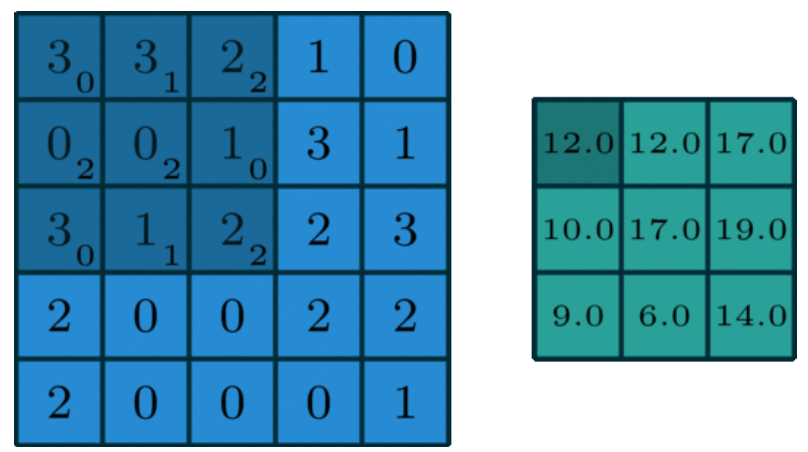

Image ref -> https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


In [37]:
# Convolutional Layers and filters: 
display(Image(image_path+'Convolutions image 2.png', width=500, unconfined=True))
print('Image ref -> https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53')

This operation is repeated (from left to right) by the kernel over the entire input data to convert the 2D matrix of features into another 2D matrix where the output is the weighted sums of the input features that is located in a similar location of the output pixel on the input layer. It should be noted that the size of the kernel directly determines the number of combinations of input features to produce the new output features. As seen in the figure above, the 5x5=25 input feature is then outputted as a 3x3=9 matrix.

##### The math can be demonstrated as:
(3x0)+(3x1)+(2x2)+(0x2)+(0x2)+(1x0)+(3x0)+(1x1)+(2x2) = 12.0, As highlighted in the diagram

In this example, the dimensions of the 25 features have been reduced down to just 9 features. The values that the kernel obtains would determine what is being identified from the properties of the image such as lines, edges, outlines, high contrasting areas etc. This is called the __identity kernel__. Multiple kernels are applied to the image simultaneously for each of the convolutional layer and as a hyperparameter, the number of kernels can be decided by the modeler. As a general rule, using fewer kernels as possible would be better while still being able to achieve acceptable cross-validation results, like trading simplicity for complexity as well as generalisability with speed rather than detail and precision. 

##### The following two diagrams shows what happens as multiple kernels are applied simultaneously:

It can be seen that the feature maps are visualised at each convolutional layer. Early on in the layers, simple visual structures like lines and edges were detected by the identity kernel. This output from the first layer is then passed to the next layer that would combine such lines and shapes into more abstract forms such as components of faces (seen in the second image below). 


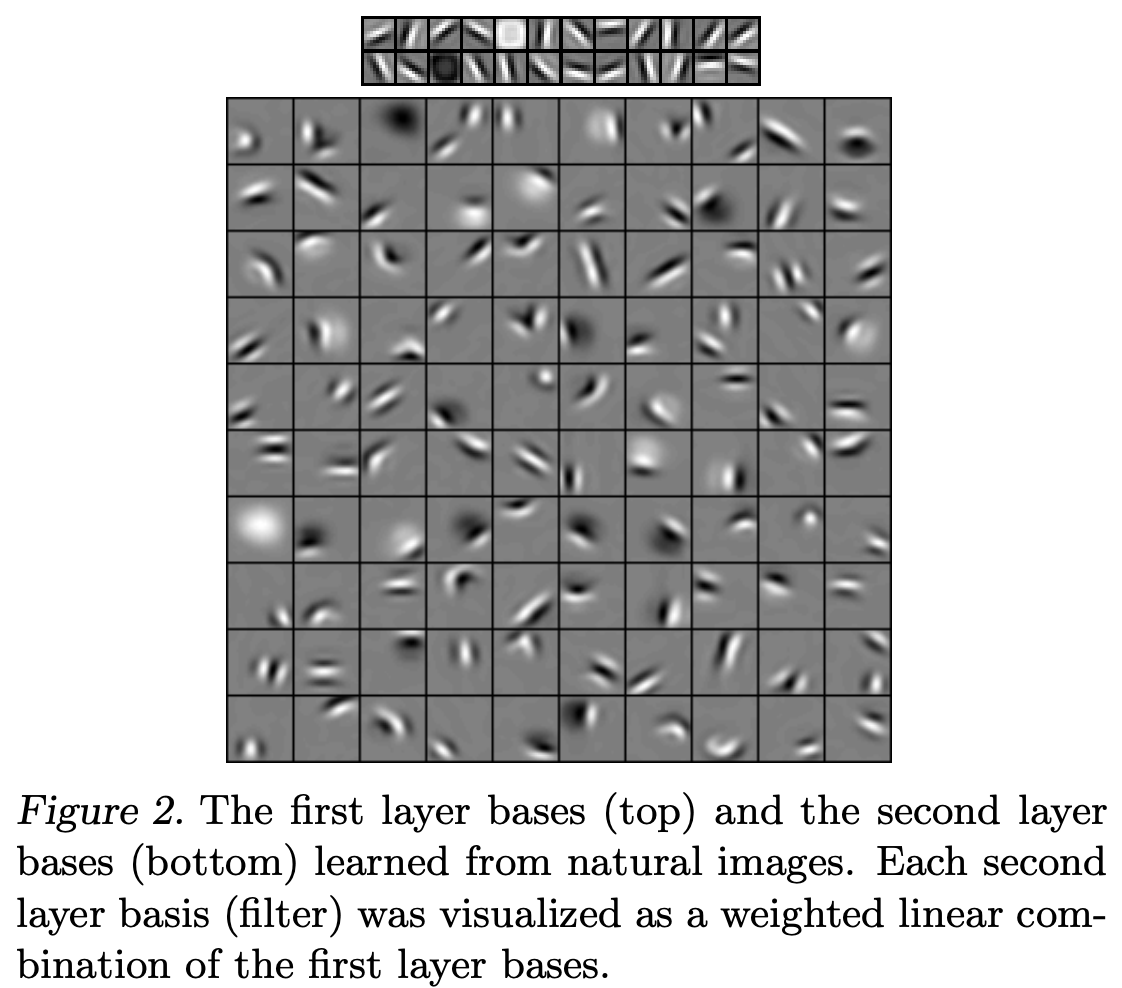

Image ref -> https://ai.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf


In [45]:
# Convolutional Layers and filters: Image 1
display(Image(image_path+'Multiple kernels 1.png', width=500, unconfined=True))
print('Image ref -> https://ai.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf')

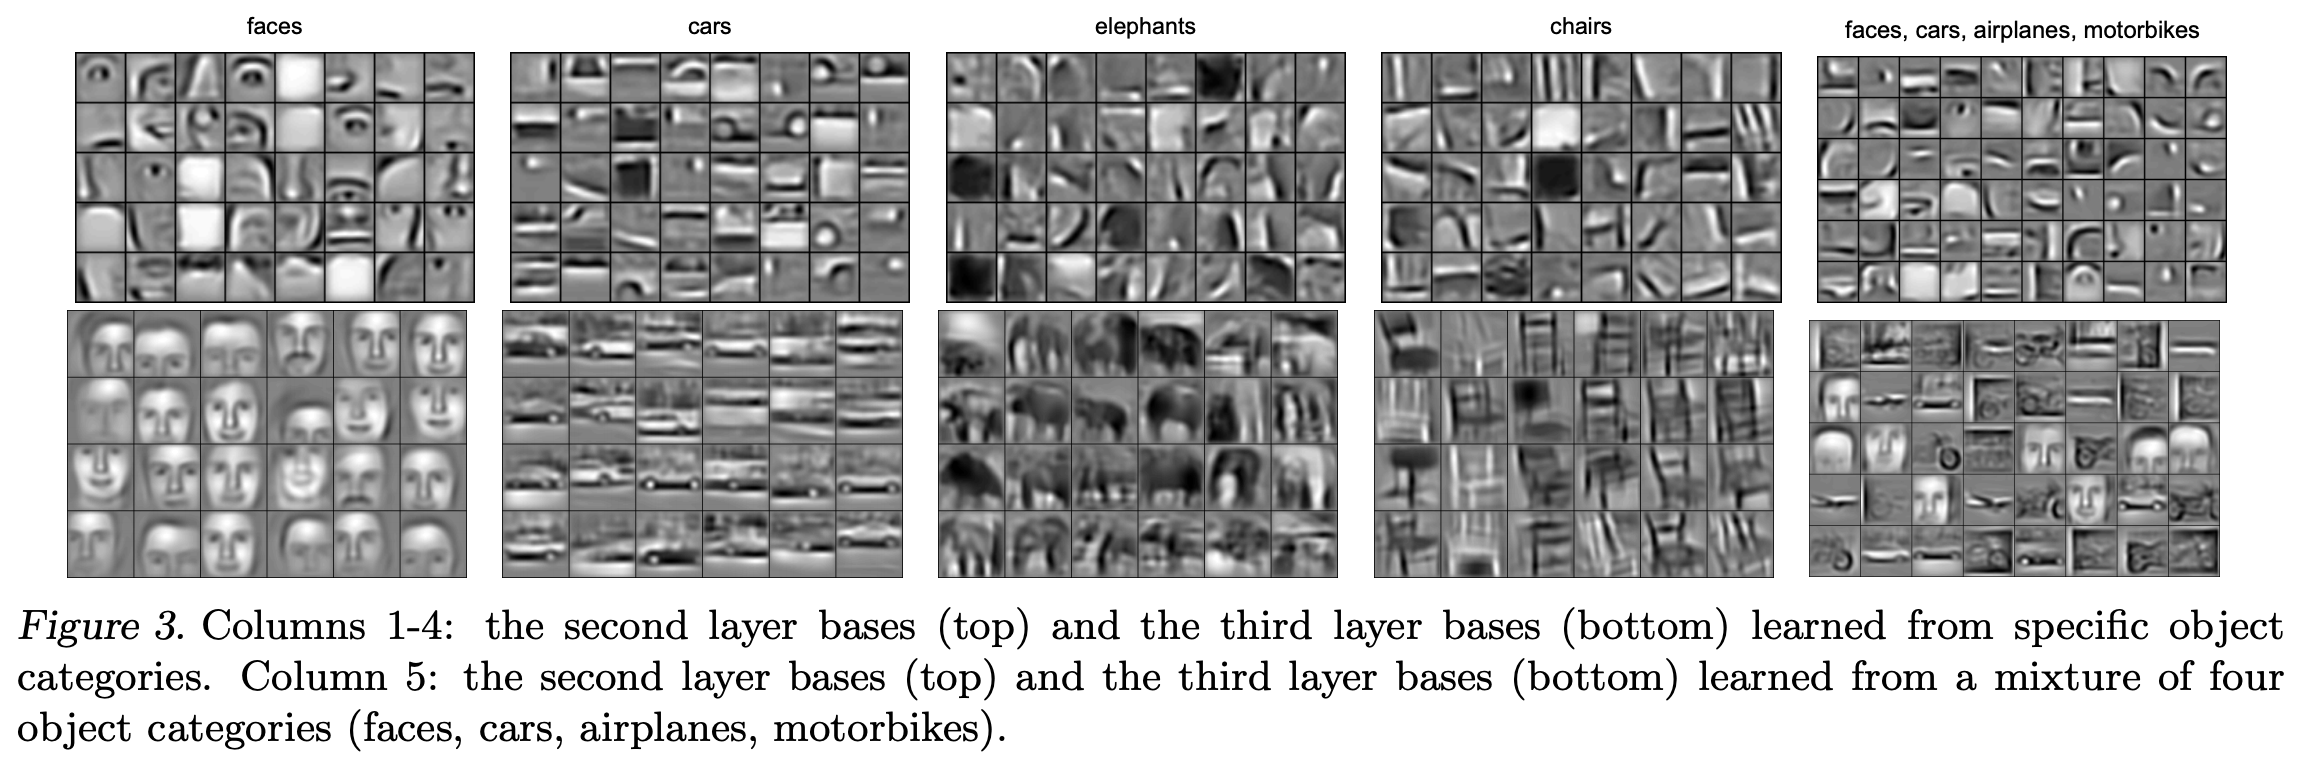

Image ref -> https://ai.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf


In [43]:
# Convolutional Layers and filters: Image 2
display(Image(image_path+'Multiple kernels 2.png', width=1100, unconfined=True))
print('Image ref -> https://ai.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf')

The output from the intermediate layer will then be passed onto the final layer where these abstract forms would be combined into complete objects like faces (seen in the diagram above).

Source: 
- (1) Saha, S. (2018). A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way. Retrieved from https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
- (2) Lee, H., Grosse, R., Ranganath, R., & Ng, A. (2009). Convolutional deep belief networks for scalable unsupervised learning of hierarchical representations. In Proceedings of the 26th International Conference On Machine Learning, ICML 2009. https://doi.org/10.1145/1553374.1553453

## 2.2 Max Pooling Layers:

Max pooling layers can also be used to further reduce dimensionality progressively after each of the alternating convolutional layers. Max pooling is where the maximum value for that instance of a window is taken as the window slides over the feature map. This essential reduces a large matrix of values from the feature map to just 4 values (or a 2 x 2 matrix). This is demonstrated in the diagram below.

Source: 
- (1) Andrew Ng, Jiquan Ngiam, Chuan Yu Foo, Yifan Mai, Caroline Suen, Adam Coates, Andrew Maas, Awni Hannun, Brody Huval, Tao Wang, S. T. (2019). Standford Deep Learning Tutorial - Pooling. Retrieved May 28, 2019, from http://deeplearning.stanford.edu/tutorial/supervised/Pooling/

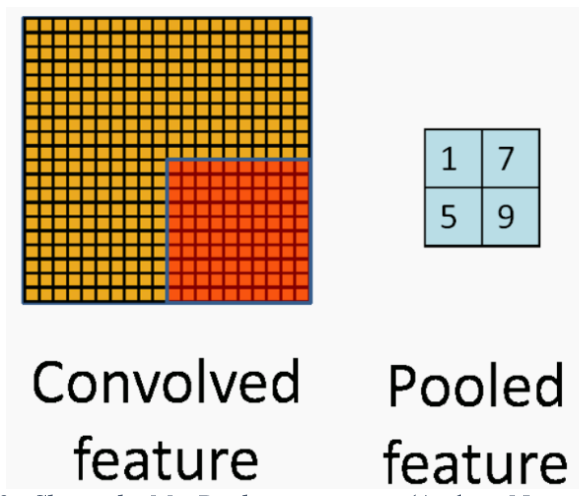

Image ref -> https://ai.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf


In [47]:
# Convolutional Layers and filters: Image 2
display(Image(image_path+'Max Pooling.png', width=400, unconfined=True))
print('Image ref -> https://ai.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf')

## 2.3 Fattening:

In the previous sections, the convolutional layers, consisting of the convolutional layer, filter, activation functions and the pooling layer, have been described to build a condensed and useful representations of the features from the input data image. Before any classification can be done, a training dataset is required, this can be built by flattening the convolved and max-pooled transformations from the previous layers into a single row of training data.

#### The following code will demonstrate how the transformations are flattened:


In [51]:
example_maxPooled = np.array( [[255, 255], [255, 255]] )
example_maxPooled

array([[255, 255],
       [255, 255]])

In [52]:
example_maxPooled.shape

(2, 2)

In [54]:
example_flattened = example_maxPooled.flatten()
example_flattened.shape

(4,)

#### The above shows the process of taking a 5 x 5 matrix such as the pixel matirx and flattened into a single row of 4 features. These 4 features can be said to be ready to be passed into the fully-connected layer of the CNN.

## 2.4 Fully-connected Layers and CNN Output:

At the end of the CNN model is where both the fully-connected and output layer resides. This is where the extracted features from the previous layer would be mapped to the target classes. For the fully-connected layer, the inputs are connected to every node (or neuron) in the next layer and the strength of these connections are governed by the weights and bias in each of the nodes. These are also parameters of the model which will be optimised during the training process in order to minimise the objective function.

The final layer of the model is the output layer where the predictions are given. These nodes will also have an activation function and its kind can be dependent on the problem being solved, such as regression, binary classification or multiclassification.

## 2.5 Extra Material:

The above sections covers some of the basics of a convolutional neural network, there are also other components that are not covered relating to the optimisation process of the model. These will be covered at a later time or can be found online. Some of these are:
- Other Activation Functions
- Gradient Descent Algorithms
- Loss Functions
- Dropout

and the list goes on. For now, the project will continue onto the next section.

## 3 Building the CNN model:

This section will cover on how to build the CNN model to classify the images of clothing articles. 

## 3.1 Dataset:

The dataset itself can be found from: https://github.com/zalandoresearch/fashion-mnist. Overall the dataset contains 70,000 images of clothing articles that are grayscale and there are only 10 possible classes. The list of labels can be seen in the diagram below:

In [56]:
# Set up the working directory for the images:
image_folderName = 'Dataset Images'
image_path = os.path.abspath(image_folderName) + '/'

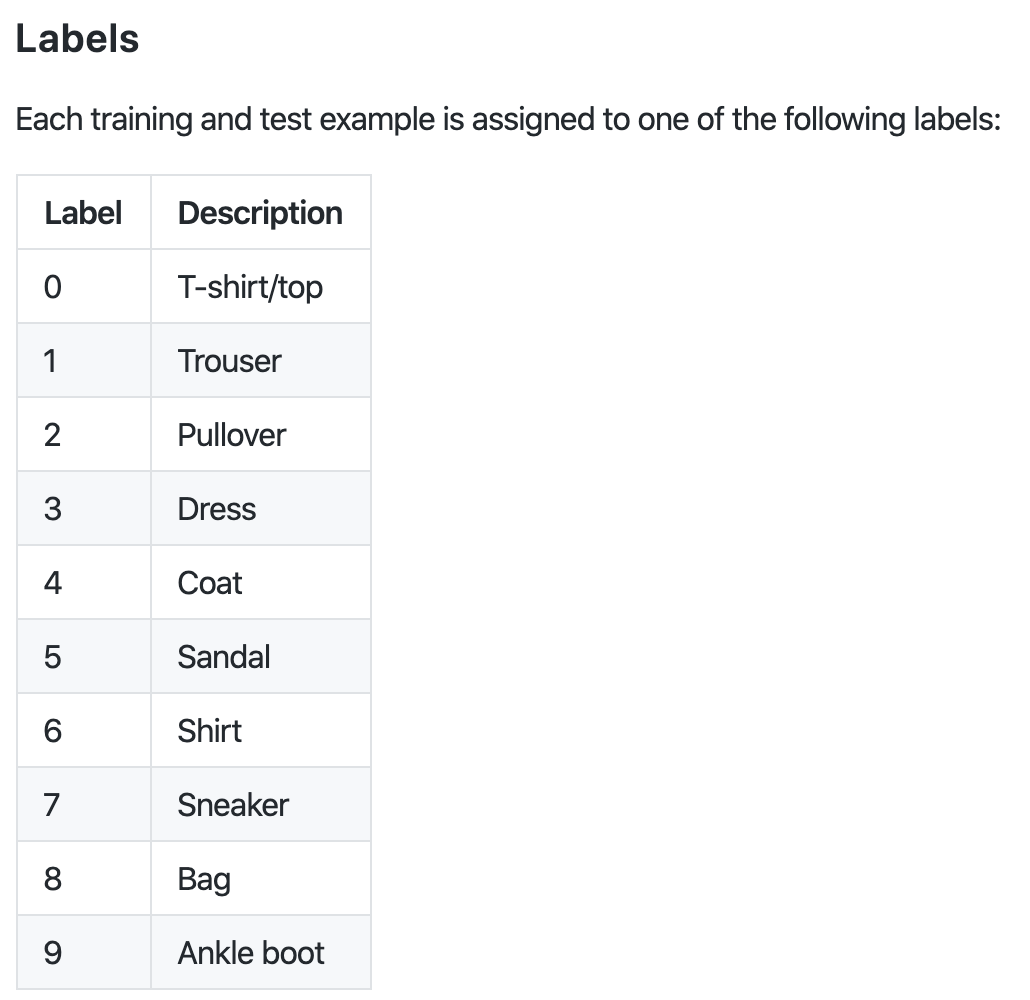

Image ref -> https://github.com/zalandoresearch/fashion-mnist


In [57]:
# Dataset Labels: 
display(Image(image_path+'dataset labels.png', width=400, unconfined=True))
print('Image ref -> https://github.com/zalandoresearch/fashion-mnist')

## 3.2 Import the required Packages:

Please make sure that both the 'keras', 'tensorflow' and 'Python Imaging Library' packages haven been installed.

In [60]:
import sys
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils, plot_model

from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
# For those who has AMD GPU and uses PlaidML for the Keras Backend: run the following code to use AMD GPU instead.
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

## 3.3 Download the Dataset:

To obtain the dataset from the source, perform the following:
1. Clone the repository to the desired folder, where in Terminal, run the following commands -> 

    - cd ~/your_folder_name/
    - git clone git@github.com:zalandoresearch/fashion-mnist.git

## 3.4 Load in the Dataset:

To do this, Zalando has already provided a helper script to load the dataset to the working directory. 

In [61]:
# Setup the directory/pathway to dataset that was cloned from GITHUB.
currentWork_path = os.getcwd()
dataset_path =  currentWork_path + '/Dataset/'
# print(dataset_path)

sys.path.append(dataset_path + "fashion-mnist/utils/")
import mnist_reader

In [63]:
# Load in the training data:
X_train, y_train = mnist_reader.load_mnist(dataset_path + "fashion-mnist/data/fashion", kind= 'train')

# Load in the testing data:
X_test, y_test = mnist_reader.load_mnist(dataset_path + "fashion-mnist/data/fashion", kind= 't10k')


In [72]:
# Inspect the files:
print('training dataset is:' )
print(X_train.shape, y_train.shape)
print('\ntesting dataset is:' )
print(X_test.shape, y_test.shape)

# Inpect the type for these files:
print('\nType of the training dataset is:' )
print(type(X_train))
print(type(y_train))
print('\nType of the testing dataset is:' )
print(type(X_test))
print(type(y_test))

training dataset is:
(60000, 784) (60000,)

testing dataset is:
(10000, 784) (10000,)

Type of the training dataset is:
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

Type of the testing dataset is:
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 3.5 Visualise the dataset:

Currently, the grayscale image data is in the form of vector values and needs to be reshaped in order to visualise it.

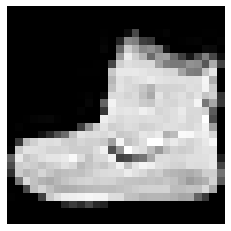

In [74]:
# Grab a sample of the data:
image_sample1 = X_train[0].reshape(28, 28)

# Plot to visualise the image:
plt.axis('off')
plt.imshow(image_sample1, cmap = 'gray')

In [75]:
# Check the class:
y_train[0]

9

#### From the class value of '9' above represents an 'ankle boot'. Cross checking this value with the image shown, it can be seen that the results are correct.

### Check out more samples of the data:

To examine how distinct each of the classes are and their respective images. This is to explore the possibility that some classes are harder to distinguish due to similar looking images but with different classes.

In [76]:
# Create a list of image mapping:
image_mapping = {0: "T-shirt/top", 
                 1:"Trouser", 
                 2:"Pullover", 
                 3:"Dress", 
                 4:"Coat", 
                 5:"Sandal", 
                 6:"Shirt", 
                 7:"Sneaker", 
                 8:"Bag", 
                 9:"Ankle Boot"}

In [80]:
# User Define Function:
def visualise_data(plot_rows, plot_columns, feature_array, target_array, cmap = 'gray', random_seed = None):
    '''
    This function will plot out the images and its title in a grid-like manner. 
    It will plot the randomly selected images from the feature array according to the plot_rows and plot_columns. 
    It will set the title for each of the image in english by un-encoding it. 
    It also takes a colour map and a random seed.
    '''
    # 1 - Chooses plot_rows * plot_columns indices at random from the X_train data:
    if random_seed is not None:
        np.random.seed(random_seed)
        
    feature_array_indices = np.random.randint(0, feature_array.shape[0], size = (plot_rows*plot_columns))
    
    # 2 - Generate the plots:
    fig, ax = plt.subplots(plot_rows, plot_columns, figsize = (18, 18))
    
    reshaped_images_list = []
    for feature_array_index in feature_array_indices:
        # 3 - Reshape the images, then append each tuple with reshaped image and its class to the list:
        reshaped_img = feature_array[feature_array_index].reshape((28, 28))
        img_class = image_mapping[target_array[feature_array_index]]
        reshaped_images_list.append((reshaped_img, img_class))
        
    # 4 - Plot each of the images in its subplot:
    counter = 0
    for row in range(plot_rows):
        for col in range(plot_columns):
            ax[row, col].axis('off')
            ax[row, col].imshow(reshaped_images_list[counter][0], cmap = cmap)
            ax[row, col].set_title(reshaped_images_list[counter][1])
            counter += 1

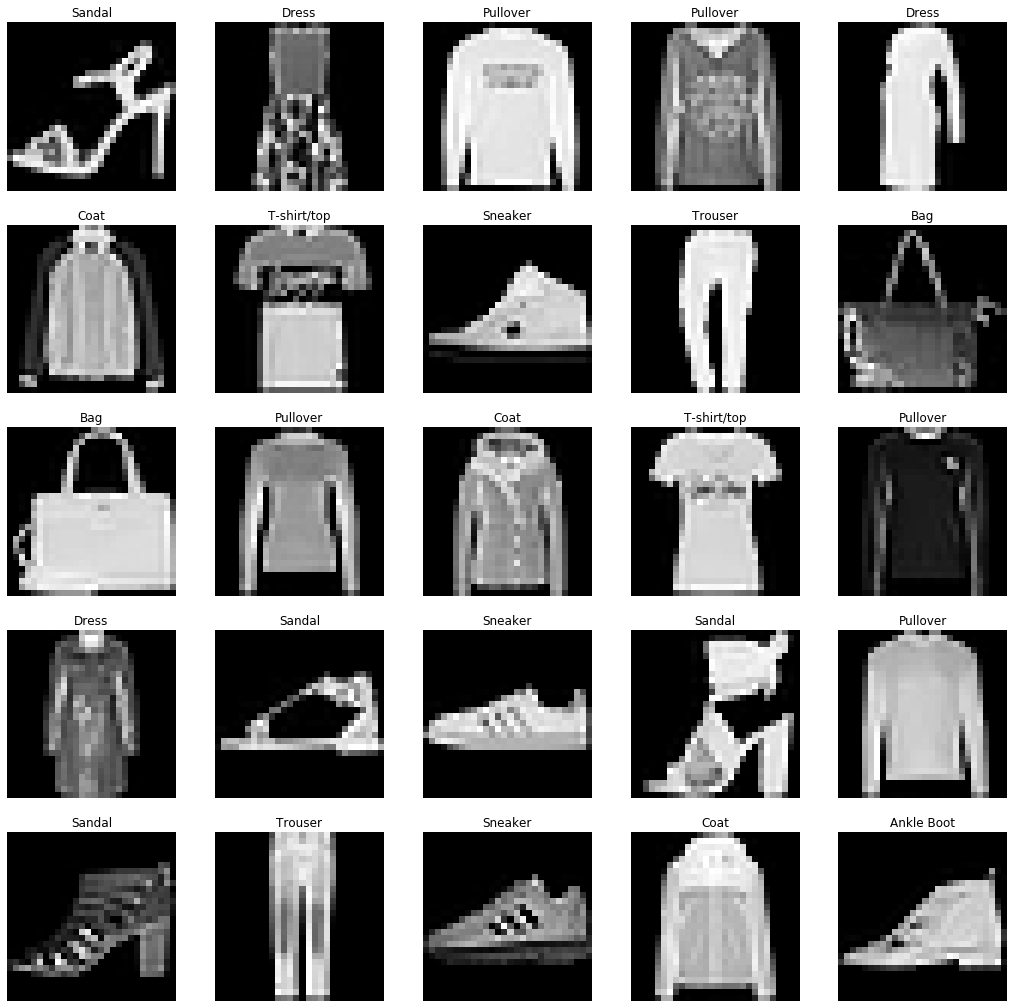

In [82]:
# Apply the function above:
visualise_data(5, 5, X_train, y_train, random_seed = 101)

It is important to note that due to lower resolution of the images, certain classes can be confused to look like another, one example is that 'Coat' can be similar to 'Pullover'. It should be noted that cases such as these can confuse the CNN model as they look similar. 

## Checkout the Target Classes from the dataset:

This part is important as well, as it will also determine if the data will need to be either upsampled or downsampled.

Text(0.5, 1.0, 'Distribution of the Target Classes')

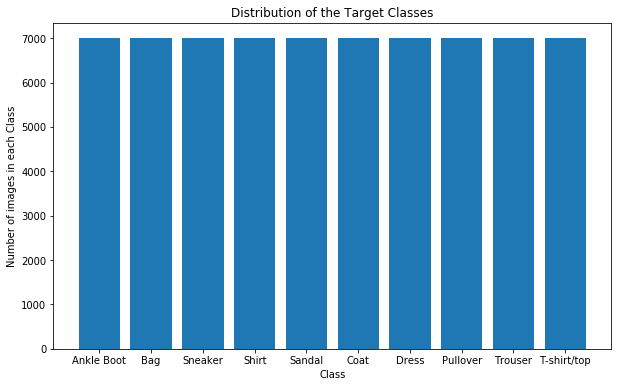

In [84]:
# Get the target class data from both train and test:
y_all_data = pd.Series(np.concatenate((y_train, y_test)))

# Plot:
plt.figure(figsize = (10, 6))
plt.bar(x = [image_mapping[x] for x in y_all_data.value_counts().index], height = y_all_data.value_counts());

plt.xlabel("Class")
plt.ylabel("Number of images in each Class")
plt.title("Distribution of the Target Classes")

As it can be seen above, all the target classes have exactly the same number of data (7,000 images each). This means that there wont be any up or down-sampling required. 

## 3.6 Normalising the Dataset:

